# Churn Prediction Project

## Import Libraries & Load Data

In [69]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
import joblib
from xgboost import XGBClassifier
import xgboost as xgb
# Explainability
import shap

In [70]:
# Load dataset (change path if needed)
df = pd.read_csv("Telco-Customer-Churn.csv")

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
df.shape

(7043, 21)

In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# EDA (Exploratory Data Analysis)

In [75]:
# Convert target to numeric for easier analysis
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

C:\Users\HP\AppData\Local\Temp\ipykernel_34132\2563448513.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


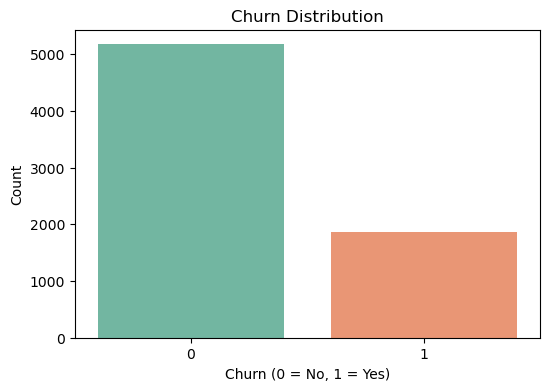

Churn rate: 26.54%


In [76]:
# 1. Churn Distribution

plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print("Churn rate: {:.2f}%".format(df["Churn"].mean()*100))

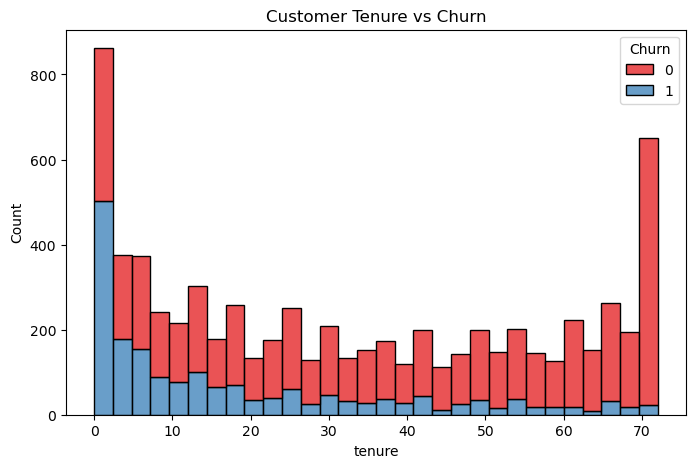

In [77]:
# 2. Tenure vs Churn

plt.figure(figsize=(8,5))
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30, palette="Set1")
plt.title("Customer Tenure vs Churn")
plt.show()

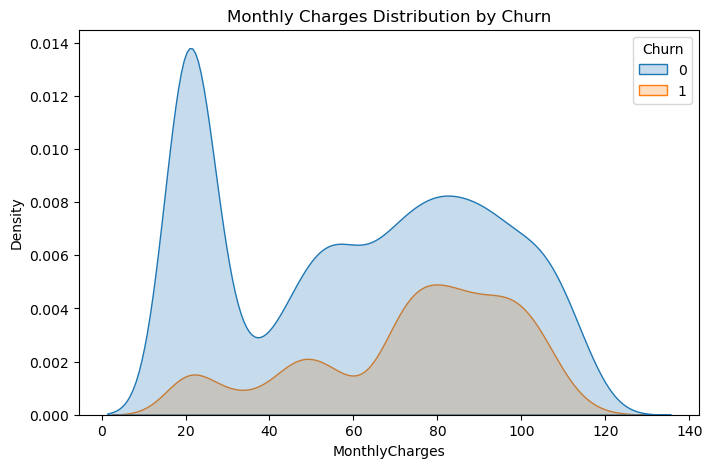

In [78]:
# 3. Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

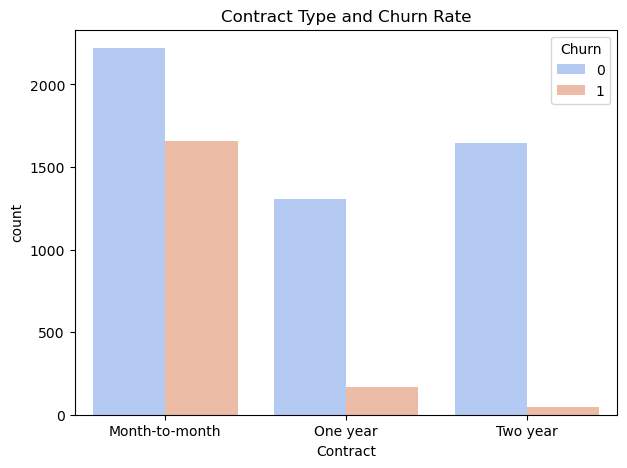

In [79]:
# 4. Contract Type vs Churn

plt.figure(figsize=(7,5))
sns.countplot(x="Contract", hue="Churn", data=df, palette="coolwarm")
plt.title("Contract Type and Churn Rate")
plt.show()

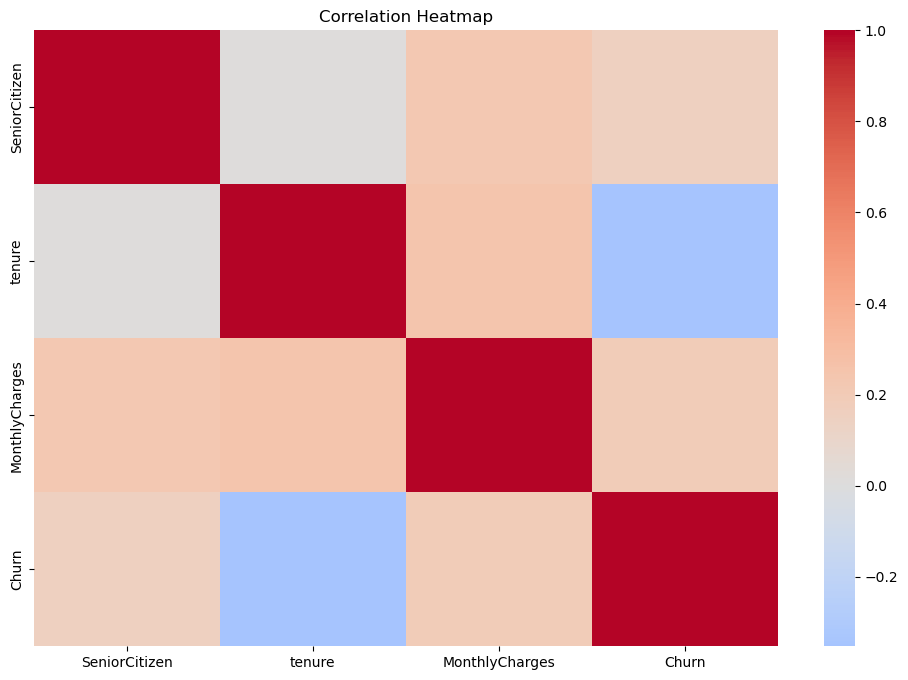

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Data Cleaning & Preprocessing

In [81]:
# Drop customerID since it's not useful
df = df.drop(columns=[col for col in df.columns if col.strip().lower() == "customerid"])

# Convert TotalCharges to numeric (some rows may be empty strings)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Handle missing values
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())

# Encode categorical variables
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    if df[col].nunique() == 2:  # Binary categories
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col])

# Features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
cat_features = []  
num_features = [] 


for col in df.columns:
    # Check if the column is in your DataFrame and add it to the appropriate list
    if col in ["Contract", "Dependents", "DeviceProtection", "InternetService"]:
        cat_features.append(col)
    elif col in ["tenure", "MonthlyCharges", "TotalCharges"]:
        num_features.append(col)

# Replace 'target_column' with your actual target column name
actual_target_column = "Churn"  

X_train = df.drop(actual_target_column, axis=1)
y_train = df[actual_target_column]

X_train = X_train[cat_features + num_features]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ],
    remainder='drop'
)

# Pipeline with preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Save pipeline (not just model)
joblib.dump(pipeline, "churn_pipeline.pkl")

['churn_pipeline.pkl']

# Model Building

## Baseline Model (Logistic Regression)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selector = SelectKBest(f_classif, k=10) 
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_selected, y_train)

y_pred_lr = log_reg.predict(X_test_selected)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_selected)[:,1]))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409

ROC-AUC: 0.8553689173662364


### Random Forest Model

In [84]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.64      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.8383735133064892


#### XGBoost Model (Main Model)

In [85]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    eval_metric="logloss"
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))

XGBoost Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.53      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC-AUC: 0.8454019895038661


# Model Explainability (SHAP)

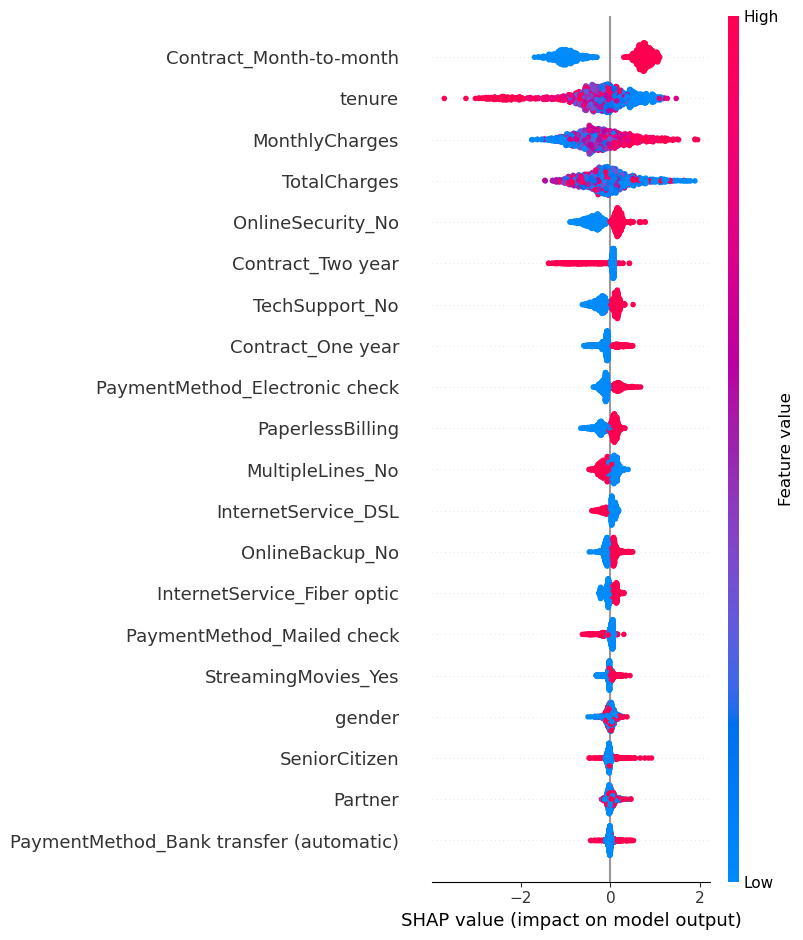

In [86]:
# Explain model predictions using SHAP
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (requires matplotlib inline if in Jupyter)
shap.summary_plot(shap_values, X_test, feature_names=df.drop("Churn", axis=1).columns)